In [0]:
"""
Recommendations:

1. Recently watched
2. Highest rated per genre
3. Latest Trending

"""

Out[1]: '\nRecommendations:\n\n1. Recently watched\n2. Highest rated per genre\n3. Latest Trending\n\n'

In [0]:
dbutils.fs.ls ("/FileStore/tables")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/Iris-1.csv', name='Iris-1.csv', size=4604),
 FileInfo(path='dbfs:/FileStore/tables/Iris-2.csv', name='Iris-2.csv', size=4604),
 FileInfo(path='dbfs:/FileStore/tables/Iris-3.csv', name='Iris-3.csv', size=4604),
 FileInfo(path='dbfs:/FileStore/tables/Iris.csv', name='Iris.csv', size=4604),
 FileInfo(path='dbfs:/FileStore/tables/links.csv', name='links.csv', size=1368578),
 FileInfo(path='dbfs:/FileStore/tables/movies-1.csv', name='movies-1.csv', size=3038099),
 FileInfo(path='dbfs:/FileStore/tables/movies.csv', name='movies.csv', size=3038099),
 FileInfo(path='dbfs:/FileStore/tables/ratings.csv', name='ratings.csv', size=226086996),
 FileInfo(path='dbfs:/FileStore/tables/tags.csv', name='tags.csv', size=38810332)]

In [0]:
#Read links.csv file

df = spark.read.format("csv").option("header",True).load("/FileStore/tables/links.csv")

In [0]:
df.show()

+-------+-------+------+
movieId| imdbId|tmdbId|
+-------+-------+------+
 1|0114709| 862|
 2|0113497| 8844|
 3|0113228| 15602|
 4|0114885| 31357|
 5|0113041| 11862|
 6|0113277| 949|
 7|0114319| 11860|
 8|0112302| 45325|
 9|0114576| 9091|
 10|0113189| 710|
 11|0112346| 9087|
 12|0112896| 12110|
 13|0112453| 21032|
 14|0113987| 10858|
 15|0112760| 1408|
 16|0112641| 524|
 17|0114388| 4584|
 18|0113101| 5|
 19|0112281| 9273|
 20|0113845| 11517|
+-------+-------+------+
only showing top 20 rows

In [0]:
import datetime
import pyspark.sql.functions as f
import pyspark.sql.types 
import pandas as pd

from pyspark.sql.functions import year, month, dayofmonth
from pyspark.sql.functions import unix_timestamp, from_unixtime
from pyspark.sql import window
from pyspark.sql.functions import rank,min

In [0]:
#File location and type

file_location = "/FileStore/tables/movies.csv"

file_type = "csv"

#csv options

infer_schema = "true"
first_row_is_header = "true"
delimiter = ','


df_movies = spark.read.format(file_type)\
          .option("inferSchema",infer_schema)\
          .option("header",first_row_is_header)\
          .option("sep",delimiter)\
          .load(file_location)

display(df_movies)

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action
10,GoldenEye (1995),Action|Adventure|Thriller


In [0]:
#create a View or Table

temp_table_name = "movies_csv"
df_movies.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

select * from movies_csv;

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action
10,GoldenEye (1995),Action|Adventure|Thriller


In [0]:
#Read links file


df_links = spark.read.format(file_type)\
                .option("inferSchema",infer_schema)\
                .option("header",first_row_is_header)\
                .option("sep",delimiter)\
                .load("/FileStore/tables/links.csv")
display(df_links)
                

movieId,imdbId,tmdbId
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862
6,113277,949
7,114319,11860
8,112302,45325
9,114576,9091
10,113189,710


In [0]:
#Read tags file

df_tags = spark.read.format(file_type)\
                .option("inferSchema",infer_schema)\
                .option("header",first_row_is_header)\
                .option("sep",delimiter)\
                .load("/FileStore/tables/tags.csv")
display(df_tags)

userId,movieId,tag,timestamp
3,260,classic,1439472355
3,260,sci-fi,1439472256
4,1732,dark comedy,1573943598
4,1732,great dialogue,1573943604
4,7569,so bad it's good,1573943455
4,44665,unreliable narrators,1573943619
4,115569,tense,1573943077
4,115713,artificial intelligence,1573942979
4,115713,philosophical,1573943033
4,115713,tense,1573943042


In [0]:
#Read ratings file

df_ratings = spark.read.format(file_type)\
                   .option("inferSchema",infer_schema)\
                   .option("header",first_row_is_header)\
                   .option("sep",delimiter)\
                   .load("/FileStore/tables/ratings.csv")
                  
display(df_ratings)

userId,movieId,rating,timestamp
1,296,5.0,1147880044
1,306,3.5,1147868817
1,307,5.0,1147868828
1,665,5.0,1147878820
1,899,3.5,1147868510
1,1088,4.0,1147868495
1,1175,3.5,1147868826
1,1217,3.5,1147878326
1,1237,5.0,1147868839
1,1250,4.0,1147868414


In [0]:
#count of records

df_movies.count()
display(df_movies)

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action
10,GoldenEye (1995),Action|Adventure|Thriller


In [0]:
df_links.count()
display(df_links)

movieId,imdbId,tmdbId
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862
6,113277,949
7,114319,11860
8,112302,45325
9,114576,9091
10,113189,710


In [0]:
df_tags.count()
display(df_tags)

userId,movieId,tag,timestamp
3,260,classic,1439472355
3,260,sci-fi,1439472256
4,1732,dark comedy,1573943598
4,1732,great dialogue,1573943604
4,7569,so bad it's good,1573943455
4,44665,unreliable narrators,1573943619
4,115569,tense,1573943077
4,115713,artificial intelligence,1573942979
4,115713,philosophical,1573943033
4,115713,tense,1573943042


In [0]:
#Movies with ratings: joining moveis DF with ratings DF

df_movies_with_ratings =  df_movies.join(df_ratings,"movieid","left")

In [0]:
display(df_movies_with_ratings)

movieId,title,genres,userId,rating,timestamp
148,"Awfully Big Adventure, An (1995)",Drama,964,1.0,898995531
148,"Awfully Big Adventure, An (1995)",Drama,2091,3.0,834040799
148,"Awfully Big Adventure, An (1995)",Drama,2545,5.0,828625487
148,"Awfully Big Adventure, An (1995)",Drama,3411,3.0,835966104
148,"Awfully Big Adventure, An (1995)",Drama,4100,2.0,839629075
148,"Awfully Big Adventure, An (1995)",Drama,4282,2.0,945966029
148,"Awfully Big Adventure, An (1995)",Drama,4296,3.0,841219374
148,"Awfully Big Adventure, An (1995)",Drama,5055,3.0,842463284
148,"Awfully Big Adventure, An (1995)",Drama,5177,2.0,874577512
148,"Awfully Big Adventure, An (1995)",Drama,6039,2.0,848773886


In [0]:
df_movies_with_ratings.count()

Out[15]: 8509513

In [0]:
#Check if there are duplicates (Movies with more than 1 rating) ---> more the count more the rating

df_movies_no_dups = df_movies_with_ratings.groupby("movieid").count()
display(df_movies_no_dups)

movieid,count
148,89
463,112
471,3661
496,138
833,471
1088,4016
1238,994
1342,1223
1580,13677
1591,1831


In [0]:
#Join our ratings DF with tags DF (Join with users dataset)

df_ratings_tags = df_ratings.join(df_tags,"movieid","inner")
display(df_ratings_tags)

movieId,userId,rating,timestamp,userId,tag,timestamp
148,964,1.0,898995531,6550,1940s,1528350247
148,964,1.0,898995531,6550,based on novel or book,1528350247
148,964,1.0,898995531,6550,england,1528350247
148,964,1.0,898995531,6550,liverpool,1528350247
148,964,1.0,898995531,6550,theatre company,1528350247
148,964,1.0,898995531,21096,nudity (topless),1400281940
148,964,1.0,898995531,95317,catchy,1434969127
148,964,1.0,898995531,122236,Nudity (Topless - Notable),1158734777
148,2091,3.0,834040799,6550,1940s,1528350247
148,2091,3.0,834040799,6550,based on novel or book,1528350247


In [0]:
df_ratings.describe()

Out[18]: DataFrame[summary: string, userId: string, movieId: string, rating: string, timestamp: string]

In [0]:
#Adding new column from timestamp col using from_unixtime: Date conversion

df_ratings = df_ratings.withColumn("tsDate", f.from_unixtime("timestamp"))

In [0]:
df_ratings.describe()

Out[50]: DataFrame[summary: string, userId: string, movieId: string, rating: string, timestamp: string, tsDate: string]

In [0]:
display(df_ratings)

userId,movieId,rating,timestamp,tsDate
1,296,5.0,1147880044,2006-05-17 15:34:04
1,306,3.5,1147868817,2006-05-17 12:26:57
1,307,5.0,1147868828,2006-05-17 12:27:08
1,665,5.0,1147878820,2006-05-17 15:13:40
1,899,3.5,1147868510,2006-05-17 12:21:50
1,1088,4.0,1147868495,2006-05-17 12:21:35
1,1175,3.5,1147868826,2006-05-17 12:27:06
1,1217,3.5,1147878326,2006-05-17 15:05:26
1,1237,5.0,1147868839,2006-05-17 12:27:19
1,1250,4.0,1147868414,2006-05-17 12:20:14


In [0]:
#String to Date conversion in the required format
df_ratings = df_ratings.select('userId','movieId','rating', f.to_date(unix_timestamp('tsDate','yyyy-MM-dd HH:MM:SS').cast("timestamp")).alias("ratingDate"))



In [0]:
display(df_ratings)

userId,movieId,rating,ratingDate
1,296,5.0,null
1,306,3.5,null
1,307,5.0,null
1,665,5.0,null
1,899,3.5,null
1,1088,4.0,null
1,1175,3.5,null
1,1217,3.5,2006-05-17
1,1237,5.0,null
1,1250,4.0,null


In [0]:
#year wise rating count
df_ratings_year = df_ratings.groupby("ratingDate").count()
display(df_ratings_year)

ratingDate,count
2006-05-17,197
2015-05-19,285
1997-02-08,93
1998-05-16,53
1996-12-22,294
2000-12-26,274
2010-08-11,155
2017-09-11,237
2017-08-11,283
1999-08-14,295


In [0]:
#finding Average ratings

df_avg_ratings = df_ratings.groupby("movieId").mean("rating")
display(df_avg_ratings)


movieId,avg(rating)
1088,3.2658117529880477
1580,3.574797104628208
3175,3.6097880928355197
44022,3.2264829239065307
175197,2.644396551724138
1645,3.5582743077913714
471,3.6705818082491124
3794,3.150763358778626
8638,3.960470730235365
33722,3.492063492063492


In [0]:
#Join avg ratings DF with movies Df on movie_ID

df = df_avg_ratings.join(df_movies,"movieId","inner")
df = df.withColumnRenamed("avg(rating)","average_rating")
display(df)

movieId,average_rating,title,genres
1088,3.2658117529880477,Dirty Dancing (1987),Drama|Musical|Romance
1580,3.574797104628208,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi
3175,3.6097880928355197,Galaxy Quest (1999),Adventure|Comedy|Sci-Fi
44022,3.2264829239065307,Ice Age 2: The Meltdown (2006),Adventure|Animation|Children|Comedy
175197,2.644396551724138,The Dark Tower (2017),Fantasy|Horror|Sci-Fi|Western
1645,3.5582743077913714,The Devil's Advocate (1997),Drama|Mystery|Thriller
471,3.6705818082491124,"Hudsucker Proxy, The (1994)",Comedy
3794,3.150763358778626,Chuck & Buck (2000),Comedy|Drama
8638,3.960470730235365,Before Sunset (2004),Drama|Romance
33722,3.492063492063492,Ladies in Lavender (2004),Comedy|Drama|Romance


In [0]:
#What do we have now in the DF?

df.printSchema()

root
-- movieId: integer (nullable = true)
-- average_rating: double (nullable = true)
-- title: string (nullable = true)
-- genres: string (nullable = true)

In [0]:
#Grouping by rating count! -> Which movie have been rated how many times?

df_total_ratings = df_ratings.groupby("movieId").count()
display(df_total_ratings)

movieId,count
1088,4016
1580,13677
3175,4955
44022,1669
175197,232
1645,4659
471,3661
3794,262
8638,1657
33722,63


In [0]:
#Filtering movies which are having less than 5 ratings in total!

df_total_ratings = df_total_ratings.where("count > 10")
df_ratings_filtered = df_ratings.join(df_total_ratings,"movieId",'inner')

In [0]:
display(df_ratings_filtered)

movieId,userId,rating,ratingDate,count
148,964,1.0,null,89
148,2091,3.0,null,89
148,2545,5.0,null,89
148,3411,3.0,null,89
148,4100,2.0,null,89
148,4282,2.0,null,89
148,4296,3.0,1996-02-28,89
148,5055,3.0,null,89
148,5177,2.0,1997-11-18,89
148,6039,2.0,null,89


In [0]:
#how many records do we have after filtering out the no. of ratings > 10

df_total_ratings.count()

Out[71]: 8975

In [0]:
#max rating per user

df_rating_per_user = df_ratings_filtered.select('userId','movieId','rating').groupby('userId','movieId').max('rating')
display(df_rating_per_user)

userId,movieId,max(rating)
964,148,1.0
2091,148,3.0
2545,148,5.0
3411,148,3.0
4100,148,2.0
4282,148,2.0
4296,148,3.0
5055,148,3.0
5177,148,2.0
6039,148,2.0


In [0]:
#joining df_rating_per user with out movies DF

df_rating_per_user_movie = df_rating_per_user.join(df_movies,'movieId','inner')

In [0]:
#renaming max column into some good name

df_rating_per_user_movie = df_rating_per_user_movie.withColumnRenamed("max(rating)","Max_rating")
display(df_rating_per_user_movie)

movieId,userId,Max_rating,title,genres
148,964,1.0,"Awfully Big Adventure, An (1995)",Drama
148,2091,3.0,"Awfully Big Adventure, An (1995)",Drama
148,2545,5.0,"Awfully Big Adventure, An (1995)",Drama
148,3411,3.0,"Awfully Big Adventure, An (1995)",Drama
148,4100,2.0,"Awfully Big Adventure, An (1995)",Drama
148,4282,2.0,"Awfully Big Adventure, An (1995)",Drama
148,4296,3.0,"Awfully Big Adventure, An (1995)",Drama
148,5055,3.0,"Awfully Big Adventure, An (1995)",Drama
148,5177,2.0,"Awfully Big Adventure, An (1995)",Drama
148,6039,2.0,"Awfully Big Adventure, An (1995)",Drama


In [0]:
temp_table_movie_with_ratings = "tb_rating_per_user_movie"
df_rating_per_user_movie.createOrReplaceTempView(temp_table_movie_with_ratings)


In [0]:

df_10 = spark.sql("""select * from tb_rating_per_user_movie where title Like 'Fugitive%'""")
display(df_10)

movieId,userId,Max_rating,title,genres
457,2,5.0,"Fugitive, The (1993)",Thriller
457,5,5.0,"Fugitive, The (1993)",Thriller
457,7,3.0,"Fugitive, The (1993)",Thriller
457,8,5.0,"Fugitive, The (1993)",Thriller
457,18,3.5,"Fugitive, The (1993)",Thriller
457,25,5.0,"Fugitive, The (1993)",Thriller
457,32,4.0,"Fugitive, The (1993)",Thriller
457,36,4.0,"Fugitive, The (1993)",Thriller
457,41,5.0,"Fugitive, The (1993)",Thriller
457,43,3.5,"Fugitive, The (1993)",Thriller


In [0]:
df_query = spark.sql("""select * from tb_rating_per_user_movie""")
display(df_query)

movieId,userId,Max_rating,title,genres
148,964,1.0,"Awfully Big Adventure, An (1995)",Drama
148,2091,3.0,"Awfully Big Adventure, An (1995)",Drama
148,2545,5.0,"Awfully Big Adventure, An (1995)",Drama
148,3411,3.0,"Awfully Big Adventure, An (1995)",Drama
148,4100,2.0,"Awfully Big Adventure, An (1995)",Drama
148,4282,2.0,"Awfully Big Adventure, An (1995)",Drama
148,4296,3.0,"Awfully Big Adventure, An (1995)",Drama
148,5055,3.0,"Awfully Big Adventure, An (1995)",Drama
148,5177,2.0,"Awfully Big Adventure, An (1995)",Drama
148,6039,2.0,"Awfully Big Adventure, An (1995)",Drama


In [0]:
df_rating = df_rating_per_user_movie.groupby('movieId','userId','title','genres').max('Max_rating')
display(df_rating)

movieId,userId,title,genres,max(Max_rating)
148,964,"Awfully Big Adventure, An (1995)",Drama,1.0
148,2091,"Awfully Big Adventure, An (1995)",Drama,3.0
148,2545,"Awfully Big Adventure, An (1995)",Drama,5.0
148,3411,"Awfully Big Adventure, An (1995)",Drama,3.0
148,4100,"Awfully Big Adventure, An (1995)",Drama,2.0
148,4282,"Awfully Big Adventure, An (1995)",Drama,2.0
148,4296,"Awfully Big Adventure, An (1995)",Drama,3.0
148,5055,"Awfully Big Adventure, An (1995)",Drama,3.0
148,5177,"Awfully Big Adventure, An (1995)",Drama,2.0
148,6039,"Awfully Big Adventure, An (1995)",Drama,2.0


In [0]:
#users with movies > 4 ratings

df_rating = df_rating.withColumnRenamed('max(Max_rating)', 'max_rating') 
df_rating = df_rating.where('max_rating >= 4') 
display(df_rating)

movieId,userId,title,genres,max_rating
148,2545,"Awfully Big Adventure, An (1995)",Drama,5.0
148,6491,"Awfully Big Adventure, An (1995)",Drama,4.0
148,12836,"Awfully Big Adventure, An (1995)",Drama,5.0
148,13280,"Awfully Big Adventure, An (1995)",Drama,4.0
148,24540,"Awfully Big Adventure, An (1995)",Drama,4.0
148,28366,"Awfully Big Adventure, An (1995)",Drama,5.0
148,29213,"Awfully Big Adventure, An (1995)",Drama,5.0
148,32268,"Awfully Big Adventure, An (1995)",Drama,4.0
148,32855,"Awfully Big Adventure, An (1995)",Drama,4.0
148,33145,"Awfully Big Adventure, An (1995)",Drama,5.0


In [0]:
#Best Movie per genre
df_movies_genre = df_rating.groupby('genres','title').count()
display(df_movies_genre)

genres,title,count
Comedy|Drama,American Splendor (2003),764
Drama,Margot at the Wedding (2007),25
Drama|Romance,"Reader, The (2008)",482
Drama|Mystery|Thriller,Insomnia (1997),268
Drama|Romance,Children of Paradise (Les enfants du paradis) (1945),256
Comedy|Drama|Horror,Taxidermia (2006),33
Mystery|Thriller,Fermat's Room (La habitación de Fermat) (2007),19
Drama|Horror|Thriller,Lost Souls (2000),28
Comedy,Moon Over Parador (1988),18
Horror,Night of the Living Dead (1990),95


In [0]:
#identity genre of user

df_rating_genre = df_rating.select('userId','title','genres').groupby('userId','genres').count()
display(df_rating_genre)

userId,genres,count
11959,Comedy,3
12353,Comedy,2
15629,Comedy,2
18677,Comedy,11
21521,Comedy,1
28973,Comedy,4
31730,Comedy,3
32093,Comedy,2
36247,Comedy,19
39028,Comedy,7


In [0]:
#DF recent movie

df_recent_movie = df_ratings.groupby('userId','movieId').agg(f.max(df_ratings['ratingDate']))
display(df_recent_movie)

userId,movieId,max(ratingDate)
3,5004,null
3,6754,null
3,35836,null
3,87232,null
4,3624,null
4,122882,null
5,1246,null
6,2028,null
8,1777,1998-07-21
11,48043,null


In [0]:
#Visualization 1

display(df_movies_genre)
#movies_df['genres_arr'] = movies_df['genres'].str.split('|')
#movies_df.head()
#counter_lambda = lambda x: len(x)
#movies_df['genre_count'] = movies_df.genres_arr.apply(counter_lambda)
#movies_df.head()

#movies_df.set_index('movieId')
#movies_df.head()

genres,title,count
Comedy|Drama,American Splendor (2003),764
Drama,Margot at the Wedding (2007),25
Drama|Romance,"Reader, The (2008)",482
Drama|Mystery|Thriller,Insomnia (1997),268
Drama|Romance,Children of Paradise (Les enfants du paradis) (1945),256
Comedy|Drama|Horror,Taxidermia (2006),33
Mystery|Thriller,Fermat's Room (La habitación de Fermat) (2007),19
Drama|Horror|Thriller,Lost Souls (2000),28
Comedy,Moon Over Parador (1988),18
Horror,Night of the Living Dead (1990),95


In [0]:
df_movies_genre_viz = df_rating.toPandas()
#df_movies_genre['genre_arr'] = df_movies_genre['genres'].str.split('|')
#df_movies_genre.head()

In [0]:
df_movies_genre_viz['genre_arr'] = df_movies_genre_viz['genres'].str.split('|')

In [0]:
df_movies_genre_viz.head()

,movieId,userId,title,genres,max_rating,genre_arr
0,148,2545,"Awfully Big Adventure, An (1995)",Drama,5.0,[Drama]
1,148,6491,"Awfully Big Adventure, An (1995)",Drama,4.0,[Drama]
2,148,12836,"Awfully Big Adventure, An (1995)",Drama,5.0,[Drama]
3,148,13280,"Awfully Big Adventure, An (1995)",Drama,4.0,[Drama]
4,148,24540,"Awfully Big Adventure, An (1995)",Drama,4.0,[Drama]


In [0]:
counter_lambda = lambda x: len(x) #counter gets incremented each time
df_movies_genre_viz['genre_count'] = df_movies_genre_viz.genre_arr.apply(counter_lambda)
df_movies_genre_viz.head()

df_movies_genre_viz.set_index('movieId')
df_movies_genre_viz.head()

,movieId,userId,title,genres,max_rating,genre_arr,genre_count
0,148,2545,"Awfully Big Adventure, An (1995)",Drama,5.0,[Drama],1
1,148,6491,"Awfully Big Adventure, An (1995)",Drama,4.0,[Drama],1
2,148,12836,"Awfully Big Adventure, An (1995)",Drama,5.0,[Drama],1
3,148,13280,"Awfully Big Adventure, An (1995)",Drama,4.0,[Drama],1
4,148,24540,"Awfully Big Adventure, An (1995)",Drama,4.0,[Drama],1


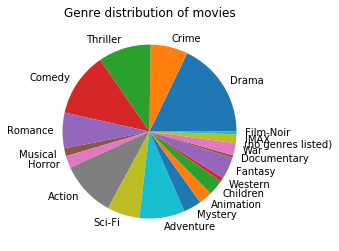

In [0]:
from collections import Counter

import pandas as pd 
from pandas import DataFrame as df
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

flattened_genres = [item for sublist in df_movies_genre_viz.genre_arr for item in sublist]

genre_dict = dict(Counter(flattened_genres))

print(genre_dict)

# now lets plot this genre distribution as a pie chart
plt.pie(genre_dict.values(), labels=genre_dict.keys())
plt.title('Genre distribution of movies')
plt.show()

#plt.savefig('./movie-genres-pie.png')

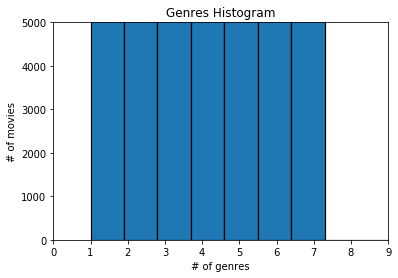

In [0]:
# Number of genres against number of movies


plt.hist(df_movies_genre_viz.genre_count,edgecolor='black', linewidth=1.2)
plt.title("Genres Histogram")
plt.xlabel("# of genres")
plt.ylabel("# of movies")
plt.axis([0, 9, 0, 5000])
plt.show()

#List of genres
from collections import Counter
flattened_genres = [item for sublist in df_movies_genre_viz.genres_arr for item in sublist]
genre_dict = dict(Counter(flattened_genres))
print(genre_dict)

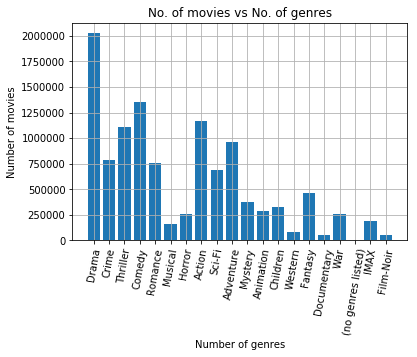

In [0]:
# For better readability
x = list(range(len(genre_dict)))
plt.title('No. of movies vs No. of genres')
plt.xticks(x, genre_dict.keys(), rotation=80)
plt.bar(x, genre_dict.values())
plt.xlabel("Number of genres")
plt.ylabel("Number of movies")
plt.grid()
plt.plot()

In [0]:
df_Pandas_ratings = df_ratings.toPandas()

In [0]:
df_Pandas_ratings.head()

,userId,movieId,rating,ratingDate
0,1,296,5.0,None
1,1,306,3.5,None
2,1,307,5.0,None
3,1,665,5.0,None
4,1,899,3.5,None


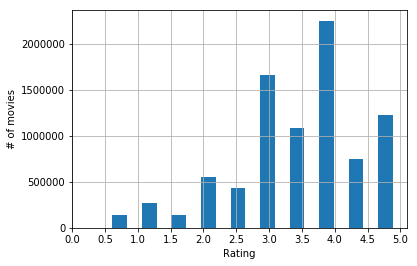

In [0]:

# Histogram of movie ratings
plt.hist(df_Pandas_ratings.rating,rwidth=0.5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.ylabel('# of movies')
plt.grid()
plt.show()

In [0]:
# Top 25 movies

#most_rated=movielens.groupby('title').size().sort_values(ascending=False)[:25]

movie_lens = df_rating.toPandas

In [0]:

#most_rated = movie_lens.groupby('title').size().sort_values(ascending=False)[:25]
display(df_rating)

movieId,userId,title,genres,max_rating
148,2545,"Awfully Big Adventure, An (1995)",Drama,5.0
148,6491,"Awfully Big Adventure, An (1995)",Drama,4.0
148,12836,"Awfully Big Adventure, An (1995)",Drama,5.0
148,13280,"Awfully Big Adventure, An (1995)",Drama,4.0
148,24540,"Awfully Big Adventure, An (1995)",Drama,4.0
148,28366,"Awfully Big Adventure, An (1995)",Drama,5.0
148,29213,"Awfully Big Adventure, An (1995)",Drama,5.0
148,32268,"Awfully Big Adventure, An (1995)",Drama,4.0
148,32855,"Awfully Big Adventure, An (1995)",Drama,4.0
148,33145,"Awfully Big Adventure, An (1995)",Drama,5.0


In [0]:
df_genres_count = df_rating.groupby('genres').count()

In [0]:
display(df_genres_count)

genres,count
Action|Drama|Horror,741
Comedy|Horror|Thriller,3944
Action|Adventure|Drama|Fantasy,13124
Adventure|Sci-Fi|Thriller,1098
Adventure|Animation,71
Action|Adventure|Drama,24309
Adventure|Sci-Fi,3451
Adventure|Children|Fantasy|Sci-Fi|Thriller,36
Animation|Children|Drama|Musical|Romance,2527
Documentary|Musical|IMAX,63
